## Objective of the Project: 
The Objective of the project is to provide a flavor of “real-life” experience of a quantitative financial analyst with the risk
management concepts learned in Financial Risk Management. The project involves activities of data preparation, financial modeling and analysis, documentation and reporting. 

## Task to be performed in the Project.

PART I: Estimate both WFC and SPY (independently) log return volatility using GARCH (1,1) from data Jan 1, 2018 to Dec 31, 2020.

PART II: Estimate the long term volatilities of your symbol and the SPY based on the GARCH(1,1)? Estimate the correlation between WFC and SPY.

PART III: Estimate 99% VaR for the symbol and SPY using historical simulation (equal weight) using data
Jan 1, 2018 to Dec 31, 2020, assuming you have invested $1 million independently for portfolios A, B and C. Moreover, back test VaR using data March 1, 2020- Feb 28, 2021 for your estimation following Basel color coding.
 
PART IV: Use the results above and the actual profit and loss on Jan 4th, 2021 to assess and discuss which
portfolio (i.e. A, B, or C) has the best risk adjusted performance, assuming 99% VaR is used for
economic capital.

# PART I

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import warnings
from pandas_datareader import data
from arch import arch_model
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
warnings.filterwarnings("ignore")

In [2]:
# Loading the data  of Wells Fargo & Co. (WFC) and SPDR S&P 500 Trust ETF (SPY) from Yahoo Finance.
wfc = data.DataReader("WFC", start='2018-1-1', end='2020-12-31', data_source='yahoo')
spy = data.DataReader("SPY", start='2018-1-1', end='2020-12-31', data_source='yahoo')

In [3]:
# Calculating the log returns of the Close Value.
spy['log_returns'] = (np.log(spy['Close'])-np.log(spy['Close'].shift(1)))
wfc['log_returns'] = (np.log(wfc['Close'])-np.log(wfc['Close'].shift(1)))

In [4]:
#Checking the values of SPY.
spy

,High,Low,Open,Close,Volume,Adj Close,log_returns
Date,,,,,,,
2018-01-02,268.809998,267.399994,267.839996,268.769989,86655700.0,253.283142,NaN
2018-01-03,270.640015,268.959991,268.959991,270.470001,90070400.0,254.885162,0.006305
2018-01-04,272.160004,270.540009,271.200012,271.609985,80636400.0,255.959488,0.004206
2018-01-05,273.559998,271.950012,272.510010,273.420013,83524000.0,257.665283,0.006642
2018-01-08,274.100006,272.980011,273.309998,273.920013,57319200.0,258.136414,0.001827
...,...,...,...,...,...,...,...
2020-12-24,369.029999,367.450012,368.079987,369.000000,26457900.0,367.795380,0.003883
2020-12-28,372.589996,371.070007,371.739990,372.170013,39000400.0,370.955048,0.008554
2020-12-29,374.000000,370.829987,373.809998,371.459991,53680500.0,370.247345,-0.001910


Text(0.5, 1.0, 'SPY Stock Price 2018-1-1 - 2020-12-31')

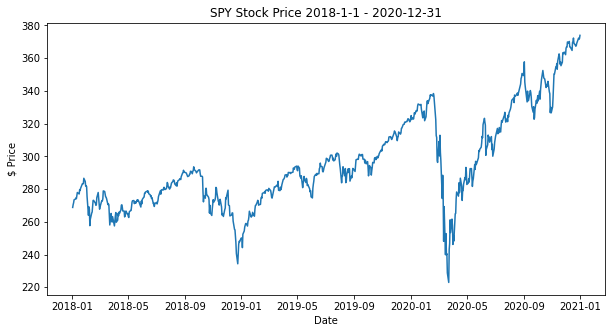

In [5]:
plt.figure(figsize=(10,5))
plt.plot(spy.index, spy['Close'])
plt.xlabel("Date")
plt.ylabel("$ Price")
plt.title("SPY Stock Price 2018-1-1 - 2020-12-31")

In [6]:
#Checking the values of WFC.
wfc

,High,Low,Open,Close,Volume,Adj Close,log_returns
Date,,,,,,,
2018-01-02,61.360001,60.700001,61.040001,61.090000,13819300.0,54.567165,NaN
2018-01-03,61.770000,61.099998,61.220001,61.560001,14203700.0,54.986977,0.007664
2018-01-04,63.049999,61.910000,61.980000,62.330002,18740500.0,55.674767,0.012431
2018-01-05,62.810001,62.090000,62.759998,62.750000,14217900.0,56.049923,0.006716
2018-01-08,62.730000,61.939999,62.660000,62.040001,15569400.0,55.415730,-0.011379
...,...,...,...,...,...,...,...
2020-12-24,30.379999,29.660000,30.290001,29.840000,14443700.0,29.681118,-0.016947
2020-12-28,30.480000,29.910000,30.080000,29.930000,21658500.0,29.770638,0.003012
2020-12-29,30.170000,29.750000,30.150000,29.780001,19584400.0,29.621439,-0.005024


Text(0.5, 1.0, 'WFC Stock Price 2018-1-1 - 2020-12-31')

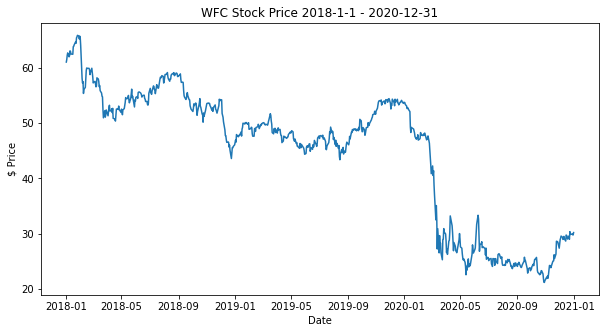

In [7]:
plt.figure(figsize=(10,5))
plt.plot(wfc.index, wfc['Close'])
plt.xlabel("Date")
plt.ylabel("$ Price")
plt.title("WFC Stock Price 2018-1-1 - 2020-12-31")

### Steps followed to apply GARCH(1,1) Model on WFC and SPY Ticker.

1. Firstly, extract the Wells Fargo & Co (ticker = WFC) and S&P 500 (ticker = SPY) data
pertaining to the required dates by using Yahoo Finance.

2. After extracting the data, calculate the log returns of the close values for Wells Fargo (WFC)
and S&P 500(SPY).

3. Then use the arch_model() module from the ARCH package to build the GARCH (1,1)
model. Moreover, in the model we need to specify a GARCH instead of ARCH model in
vol=’GARCH’ and assign lag parameters (p,q).


### Objective for using GARCH Model 

The goal of GARCH is to provide volatility measures for heteroscedastic time series data, much in the same way standard deviations are interpreted in simpler models.

### Applying the GARCH Model 

In [8]:
#Applying GARCH(1,1) Model on SPY
spy_garch = arch_model(spy.log_returns[1:]*100, mean='Zero', vol='GARCH',p=1,q=1)
result_spy_garch = spy_garch.fit(update_freq=7)
result_spy_garch.summary()

Iteration:      7,   Func. Count:     38,   Neg. LLF: 1070.6765842455266
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1070.676584245651
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1070.68
Distribution:                  Normal   AIC:                           2147.35
Method:            Maximum Likelihood   BIC:                           2161.23
                                        No. Observations:                  755
Date:                Thu, May 13 2021   Df Residuals:                      755
Time:                        18:49:06   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0531  2.230e-02      2.382  1.723e-02 [9.409e-03,9.683e-02]
alpha[1]       0.2438  4.849e-02      5.028  4.961e-07     [  0.149,  0.339]
beta[1]        0.7388  3.672e-02     20.123  4.635e-90     [  0.667,  0.811]
============================================================================

Covariance estimator: robust
"""

In [9]:
#Printing the values of Omega, Alpha and Beta.
print("Omega:",result_spy_garch.params["omega"])
print("Alpha:",result_spy_garch.params["alpha[1]"])
print("Beta:",result_spy_garch.params["beta[1]"])

Omega: 0.05311807589082896
Alpha: 0.24377456187723942
Beta: 0.7388237291074509


In [10]:
#Applying GARCH(1,1) Model on WFC
wfc_garch = arch_model(wfc.log_returns[1:]*100, mean='Zero', vol='GARCH',p=1,q=1)
result_wfc_garch = wfc_garch.fit(update_freq=7)
result_wfc_garch.summary()

Iteration:      7,   Func. Count:     39,   Neg. LLF: 1529.3299580027308
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1529.32995273475
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1529.33
Distribution:                  Normal   AIC:                           3064.66
Method:            Maximum Likelihood   BIC:                           3078.54
                                        No. Observations:                  755
Date:                Thu, May 13 2021   Df Residuals:                      755
Time:                        18:49:06   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2458      0.156      1.574      0.116 [-6.031e-02,  0.552]
alpha[1]       0.2238      0.132      1.700  8.906e-02 [-3.417e-02,  0.482]
beta[1]        0.7349      0.128      5.733  9.850e-09    [  0.484,  0.986]
===========================================================================

Covariance estimator: robust
"""

In [11]:
#Printing the values of Omega, Alpha and Beta.
print("Omega:",result_wfc_garch.params["omega"])
print("Alpha:",result_wfc_garch.params["alpha[1]"])
print("Beta:",result_wfc_garch.params["beta[1]"])

Omega: 0.24579654930831057
Alpha: 0.22377374105594036
Beta: 0.734858917935758


# PART II: Long Term Volatility (VL)

### Steps to calculate Long Term Volatility
We know that,
𝝎 = 𝜸𝑽𝑳
Where VL is the long-term volatility.

And,
𝜸 + 𝜶 + 𝜷 = 𝟏

Therefore, using the above equations,
𝑽𝑳 = 𝝎/(𝟏 − 𝜶 − 𝜷)
Therefore, we use the values of alpha, beta and omega to calculate the long-term volatility.

In [12]:
#Defining the parameters for SPY from the GARCH model. 
alpha_spy=result_spy_garch.params["alpha[1]"]
beta_spy=result_spy_garch.params["beta[1]"]
omega_spy=result_spy_garch.params["omega"]/10**4

#Defining the parameters for WFC from the GARCH model.
alpha_wfc=result_wfc_garch.params["alpha[1]"]
beta_wfc=result_wfc_garch.params["beta[1]"]
omega_wfc=result_wfc_garch.params["omega"]/10**4

#Long term volatility of stock
gamma_wfc = 1-alpha_wfc-beta_wfc
VL_wfc = np.sqrt(omega_wfc/gamma_wfc)
print("The long term volatility of WFC is:", VL_wfc*100,"%")

#Long term volatility of index
gamma_spy = 1-alpha_spy-beta_spy
VL_spy = np.sqrt((omega_spy/gamma_spy))
print("The long term volatility of SPY is:", VL_spy*100,"%")

The long term volatility of WFC is: 2.437581176997433 %
The long term volatility of SPY is: 1.7471299812907712 %


## Volatilities of the symbols on 2021-01-04

### Steps required to calculate the Volatilities of the symbols on 2021-01-04

To calculate the required volatilities of the stock and the index on Jan 4th, 2021, the following steps were followed:
1. The GARCH(1,1) model is used to forecast the the 1 day volatilities on Jan 4th , 2021. In the below code, horizon =1 means that we have taken 1 day as our input parameters. 
2. As the market was closed on January 1st, January 2nd and January 3rd, therefore, we can use the GARCH(1,1) model of both the symbol and the index as on Dec 31st , 2020.


In [13]:
#Volatility of Stock on 2021-01-04 (WFC)
vol_wfc = math.sqrt(result_wfc_garch.forecast(horizon=1).variance.iloc[-1])
print("The Volatility of WFC on 2021-01-04 is:",vol_wfc)

#Volatility of Index on 2021-01-04 (SPY)
vol_spy = math.sqrt(result_spy_garch.forecast(horizon=1).variance.iloc[-1])
print("The Volatility of SPY on 2021-01-04 is:",vol_spy)

The Volatility of WFC on 2021-01-04 is: 1.764343204541756
The Volatility of SPY on 2021-01-04 is: 0.6357065411000443


## Correlation between the returns of WFC and SPY

The correlation coefficient can be used to summarize the strength of the linear relationship between two data samples. 

### Steps followed to calculate the correlation are:

1. Python has an inbuilt function called .corr() which automatically gives the correlation between two different datasets. In our case, we calculated the correlation between 
2. The mathematics behind the function .corr() is defined below.

### Method to calculate correlation

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample.	
The formula for correlation is,


ρ=(E(WFC×SPY) - E(WFC)E(SPY)) / (STD(WFC)STD(SPY))


In [14]:
corr_spy_wfc = {'SPY Close':spy['log_returns'], 'WF Close':wfc['log_returns']}
corr_spy_wfc = pd.DataFrame(data=corr_spy_wfc)
corr_spy_wfc.dropna(inplace=True)
print("The correlation between the returns of WFC and SPY is:",corr_spy_wfc.corr()['SPY Close']['WF Close'])

The correlation between the returns of WFC and SPY is: 0.734476239266421


# PART III

# Portfolio A - Calculating one day 99% VaR using Historical Simulation

### Steps followed to calculated One Day 99% VaR and One Day 99% Expected Shortfall.

1.	Ticker used in the code is ‘WFC’ and an investment of $1 million is assumed.
2.	The data is extracted using Yahoo Finance pertinent to the mentioned time period.
3.	Multiple scenarios were generated i.e. For each scenario, the dollar change in the value of the portfolio between today and tomorrow is calculated. For instance, for scenario 1, the close price of day 1/day 0 is calculated, for scenario 2, the close price of day 2/day 1 is calculated and so on.
4.	For each scenario, we calculated the loss by subtracting the values of the portfolio from the investment.
5.	The losses are then arranged in the descending order.
6.	We then extract the top ‘1’ percent values from the losses. The length of the dataset is 756, therefore, we will take one percent as the 7th value. This value represents the one-day 99% VaR.
7.	Similarly, to calculate the one-day 99% ES, the average of top 1 percent losses is calculated.

The above mentioned procedure is used to calculate the VaR and Expected Shortfall for Portfolio A, B and C.


In [15]:

#investment in Portfolio A is 1 Million.
investment=1000000

# Create a portfolio of WFC
ticker = ['WFC']

# Download closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2020-12-31")['Close']
data['returns'] = (data['WFC'])/(data['WFC'].shift(1))

#Generating scenarios
generating_scenarios = data['returns']*data['WFC'][-1]
generating_scenarios.dropna(inplace=True)
generating_scenarios

#A represents the value of portfolio under different scenarios
A = (generating_scenarios*investment)/data['WFC'][-1]

#Calculating the loss
loss_A = (investment-A)
loss_A.sort_values(inplace=True, ascending=False)

#Calculating the 1 Day 99% Value at Risk (VaR)
VaR_99_A = loss_A.head(10)[6]

#Calculating the 1 Day 99% Expected Shortfall (ES)
ES_99_A = np.mean(loss_A[:6])
ES_99_A

print("For Portfolio A")
print("1 Day 99% Value at Risk (VaR) =", VaR_99_A)
print("1 Day 99% Expected Shortfall (ES) =", ES_99_A)

For Portfolio A
1 Day 99% Value at Risk (VaR) = 78392.24220238079
1 Day 99% Expected Shortfall (ES) = 117516.68188552333


# Backtest

### Back Testing
Back testing is used to determine the accuracy of a VaR model. Backtesting involves the comparison of the calculated VaR measure to the actual losses (or gains) achieved on the portfolio. A backtest relies on the level of confidence that is assumed in the calculation.


In [16]:
ticker=['WFC']
investment=1000000
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2020-12-31")['Close']
data_backtest= pdr.get_data_yahoo(ticker, start="2020-03-01", end="2021-02-28")['Close']
no_of_share=investment/data.loc['2020-12-31']['WFC']
change_in_price=[]
for i in range(len(data_backtest)-1):
    change_in_price.append(no_of_share*(data_backtest['WFC'][i+1]-data_backtest['WFC'][i]))
change_in_price

exceed = [ i for i in change_in_price if i > VaR_99_A]
print("The number of times the actual VaR exceeded the calculated VaR: ",len(exceed),"times")

The number of times the actual VaR exceeded the calculated VaR:  6 times


# Portfolio B - Calculating one day 99% VaR using Historical Simulation

In [17]:
#investment in Portfolio B is 1 Million.
investment=1000000

# Create a portfolio of SPY
ticker = ['SPY']

# Download the closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2020-12-31")['Close']
data['returns'] = (data['SPY'])/(data['SPY'].shift(1))

#Generating scenarios
generating_scenarios = data['returns']*data['SPY'][-1]
generating_scenarios.dropna(inplace=True)

#B represents the value of portfolio under different scenarios
B = (generating_scenarios*investment)/data['SPY'][-1]

#Calculating the loss
loss_B = (investment-B)
loss_B.sort_values(inplace=True, ascending=False)

#Calculating the 1 Day 99% Value at Risk (VaR)
VaR_99_B = loss_B.head(10)[6]

#Calculating the 1 Day 99% Expected Shortfall (ES)
ES_99_B = np.mean(loss_B[:6])
ES_99_B

print("For Portfolio B")
print("1 Day 99% Value at Risk (VaR) =", VaR_99_B)
print("1 Day 99% Expected Shortfall (ES) =", ES_99_B)

For Portfolio B
1 Day 99% Value at Risk (VaR) = 48688.16981634952
1 Day 99% Expected Shortfall (ES) = 73370.94789777206


# Portfolio  C - Calculating one day 99% VaR using Historical Simulation

In [18]:
#investment 1 Million each in SPY and WFC.
investment=1000000

# Create a portfolio of a mixture of SPY and WFC
ticker = ['SPY','WFC']

# Download the closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2020-12-31")['Close']
data['Returns_WFC'] = (data['WFC'])/(data['WFC'].shift(1))
data['Returns_SPY'] = (data['SPY'])/(data['SPY'].shift(1))

#Generating scenarios
generating_scenarios = pd.DataFrame(data=data[['Returns_WFC','Returns_SPY']])
generating_scenarios['wfc'] = data['Returns_WFC']*data['WFC'][-1]
generating_scenarios['spy'] = data['Returns_SPY']*data['SPY'][-1]
generating_scenarios.dropna(inplace=True)
generating_scenarios = generating_scenarios[['wfc','spy']]

#C represents the value of portfolio under different scenarios
C = (generating_scenarios['wfc']*investment)/data['WFC'][-1]+(generating_scenarios['spy']*investment)/data['SPY'][-1]

#Calculating the loss
investment=2000000
loss_C = (investment-C)
loss_C.sort_values(inplace=True, ascending=False)

#Calculating the 1 Day 99% Value at Risk (VaR)
VaR_99_C = loss_C.head(10)[6]

#Calculating the 1 Day 99% Expected Shortfall (ES)
ES_99_C = np.mean(loss_C[:6])
ES_99_C

print("For Portfolio C")
print("1 Day 99% Value at Risk (VaR) =", VaR_99_C)
print("1 Day 99% Expected Shortfall (ES) =", ES_99_C)

For Portfolio C
1 Day 99% Value at Risk (VaR) = 119220.93645872525
1 Day 99% Expected Shortfall (ES) = 187569.89675263126


# Portfolio  C - Calculating one day 99% VaR using Normal Distribution



### Steps followed to calculated One Day 99% VaR using Normal Distribution.

1.	Let us assume that the portfolio returns follows a normal distribution.
2.	Calculate the standard deviation and the correlation between the stock ‘WFC’ and the index ‘SPY’.
3.	After following step2, calculate the standard deviation of the portfolio.
4.	Calculate the z-value corresponding to one percentile in normal distribution
5.	Multiply the z value with the volatility of portfolio C to obtain the one-day 99% VaR.


In [19]:
# Create our portfolio of equities
investment=1000000
ticker = ['SPY','WFC']
mean=0

# Download closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2020-12-31")['Adj Close']

# Calculating the log return
data['Returns_SPY'] = np.log(data['SPY'])/(data['SPY'].shift(1))
data['Returns_WFC'] = np.log(data['WFC'])/(data['WFC'].shift(1))

# Calculating the standard deviation of the returns of SPY and WFC
std_spy=np.std(data['Returns_SPY'])*investment
std_wfc=np.std(data['Returns_WFC'])*investment

#Calculating Z value using normal distribution.
Z_value = norm.ppf(.99)

#Calculating the correlation
correlation = data.corr()['SPY']['WFC']
correlation

#The standard deviation of the one-day change in the value of the portfolio
std_portfolio = np.sqrt((std_spy**2)+(std_wfc**2)+(2*correlation*std_spy*std_wfc))

#Calculating the VaR
VaR_99 = mean + std_portfolio*Z_value
print("1 Day 99% Value at Risk (VaR) using Normal Distribution is =", VaR_99)

1 Day 99% Value at Risk (VaR) using Normal Distribution is = 46972.717659595044


# PART IV: Performance of the Portfolio

### Definition of RAROC

Risk-adjusted return on capital (RAROC) is a risk-adjusted measure of the return on investment. 
It does this by accounting for any expected losses and income generated by capital, with the assumption 
that riskier projects should be accompanied by higher expected returns

### Steps followed to calculate Risk-adjusted returns on capital (RAROC),
1. Download the stock price from yahoo finance for the given period.
2. Find the change in stock price to understand if there is a loss or gain and multiply it with total shares to calculate loss at portfolio level.
3. Then we calculate RAROC using the following formula,

RAROC = (Expected Return) / (99 % VAR) X 100

Using the above steps to calculate the RAROC for Portfolio A, B and C


### Risk-Adjusted Return On Capital (RAROC) for Portfolio A

In [20]:
investment=1000000
# Create our portfolio of equities
ticker = ['WFC']

# Download closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2021-01-04")['Close']
Price_wfc_1 = data.loc['2020-12-31']['WFC']
Price_wfc_2 = data.loc['2021-01-04']['WFC']

#Calculating number of share
No_of_share = investment/Price_wfc_1

#Calculating change in price
Change_in_price_wfc = Price_wfc_2 - Price_wfc_1

#Calculating if there is a gain or loss
gain_or_loss = Change_in_price_wfc*No_of_share

#Calculating RAROC for Portfolio A
RAROC_A=(gain_or_loss/VaR_99_A)*100
print("The actual profit and loss on Jan 4th, 2021 for Portfolio A is: ", gain_or_loss)
print("The Risk-Adjusted Return On Capital (RAROC)  for Portfolio A is: ",RAROC_A,"%")

The actual profit and loss on Jan 4th, 2021 for Portfolio A is:  -15904.557236005381
The Risk-Adjusted Return On Capital (RAROC)  for Portfolio A is:  -20.28843261677028 %


### Risk-Adjusted Return On Capital (RAROC) for Portfolio B

In [21]:
investment=1000000
# Create our portfolio of equities
ticker = ['SPY']

# Download closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2021-01-04")['Close']
Price_spy_1 = data.loc['2020-12-31']['SPY']
Price_spy_2 = data.loc['2021-01-04']['SPY']

#Calculating number of share
No_of_share = investment/Price_spy_1

#Calculating change in price
Change_in_price_spy = Price_spy_2 - Price_spy_1

#Calculating if there is a gain or loss
gain_or_loss = Change_in_price_spy*No_of_share

#Calculating RAROC for Portfolio A
RAROC_B=(gain_or_loss/VaR_99_B)*100
print("The actual profit and loss on Jan 4th, 2021  for Portfolio B is: ", gain_or_loss)
print("The Risk-Adjusted Return On Capital (RAROC)  for Portfolio B is: ",RAROC_B,"%")

The actual profit and loss on Jan 4th, 2021  for Portfolio B is:  -13613.983822125
The Risk-Adjusted Return On Capital (RAROC)  for Portfolio B is:  -27.96158465901796 %


### Risk-Adjusted Return On Capital (RAROC) for Portfolio C

In [22]:
investment=1000000 #Investing 1 Million in both SPY and WFC
# Create our portfolio of equities
ticker = ['SPY','WFC']

# Download closing prices
data = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2021-01-04")['Close']
Price_spy_1 = data.loc['2020-12-31']['SPY']
Price_spy_2 = data.loc['2021-01-04']['SPY']

#Calculating number of share of SPY
No_of_share = investment/Price_spy_1
Change_in_price_spy = Price_spy_2 - Price_spy_1

#Calculating if there is a gain or loss
gain_or_loss_spy = Change_in_price_spy*No_of_share

#Calculating change in price
Price_wfc_1 = data.loc['2020-12-31']['WFC']
Price_wfc_2 = data.loc['2021-01-04']['WFC']

#Calculating number of share of WFC
No_of_share = investment/Price_wfc_1
Change_in_price_wfc = Price_wfc_2 - Price_wfc_1

#Calculating if there is a gain or loss
gain_or_loss_wfc = Change_in_price_wfc*No_of_share
Total_gain_or_loss = gain_or_loss_spy+gain_or_loss_wfc

#Calculating RAROC for Portfolio C
RAROC_C=(Total_gain_or_loss/VaR_99_C)*100
print("The actual profit and loss on Jan 4th, 2021  for Portfolio C is: ", Total_gain_or_loss)
print("The Risk-Adjusted Return On Capital (RAROC)  for Portfolio C is: ",RAROC_C,"%")

The actual profit and loss on Jan 4th, 2021  for Portfolio C is:  -29518.54105813038
The Risk-Adjusted Return On Capital (RAROC)  for Portfolio C is:  -24.759527927672178 %


# Thank You...!!